<a href="https://colab.research.google.com/github/Asfilia/Project_Data_Science/blob/main/Image_Detection_yolov3_tiny_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Enabling GPU within your notebook
You need to enable GPU acceleration within your Colab notebook so that your YOLOv3 system will be able to process detections over 100 faster than CPU.

### Steps:

### i) Click **Edit** at top left of your notebook
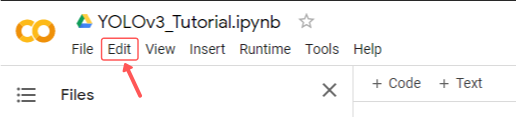
### ii) Click **Notebook Settings** within dropdown
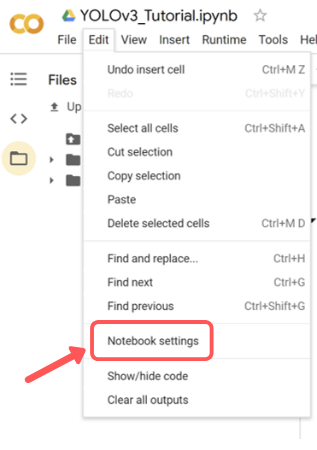
### iii) Under 'Hardware Accelerator' select **GPU** and then hit **Save**
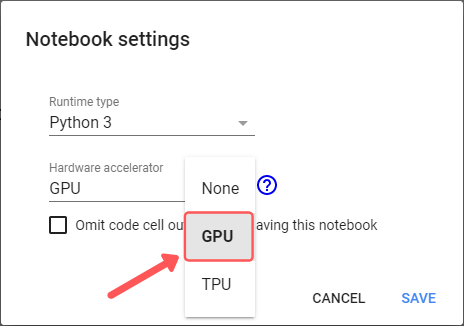

Your notebook should now have GPU enabled!

In [ ]:
!nvidia-smi

Wed Nov 23 05:49:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## STEP 2: Upload File di Google Drive dan Sambungkan ke Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Aplikasi Tailor '   GenBI		   'My Drive'
 Cinematography     'Innovative App Idea'   Software
'Colab Notebooks'   'KKM-DR2020 '	    yolov3Tiny


## STEP 3: Cloning dan Building darknet

In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet'

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

[Errno 20] Not a directory: 'darknet'
/content/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
     

## STEP 4: SETTING CONFIGURATION yolov3_training.cfg

In [ ]:
# download cfg to google drive and change its name
#!cp cfg/yolov3.cfg /mydrive/yolov3Tiny/yolov3_training.cfg

In [ ]:
!cp cfg/yolov3-tiny.cfg cfg/yolov3_training.cfg
 # !sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
 # !sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
 # !sed -i 's/max_batches = 500200/max_batches = 500/' cfg/yolov3_training.cfg
 # !sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
 # !sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
 # !sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
 # !sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
 # !sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
 # !sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [ ]:
!echo -e 'mangga' > data/obj.names
!echo -e 'classes= 1\ntrain= data/train.txt\nvalid= data/test.txt\nnames= data/obj.names\nbackup= /mydrive/yolov3Tiny' > data/obj.data

In [ ]:
!cp data/obj.names /mydrive/yolov3Tiny/classes1.txt

In [ ]:
!mkdir data/obj

In [ ]:
!unzip /mydrive/yolov3Tiny/mangga.zip -d data/obj

Archive:  /mydrive/yolov3Tiny/mangga.zip
  inflating: data/obj/31_29_11zon.jpg  
  inflating: data/obj/31_29_11zon.txt  
  inflating: data/obj/31CJV8T1RDL.jpg  
  inflating: data/obj/31CJV8T1RDL.txt  
  inflating: data/obj/51p6mVRINcL._AC_.jpg  
  inflating: data/obj/51p6mVRINcL._AC_.txt  
  inflating: data/obj/61+XH9x-HgL._SL1107_.jpg  
  inflating: data/obj/61+XH9x-HgL._SL1107_.txt  
  inflating: data/obj/360_F_322041178_xiCgOkWQylZjTgGwTlDnAlnZQDko7Knv.jpg  
  inflating: data/obj/360_F_322041178_xiCgOkWQylZjTgGwTlDnAlnZQDko7Knv.txt  
  inflating: data/obj/360_F_408566701_FRAl0WIyGTvopxIuRGgx0iHUfNibGcNM.jpg  
  inflating: data/obj/360_F_408566701_FRAl0WIyGTvopxIuRGgx0iHUfNibGcNM.txt  
  inflating: data/obj/4758.jpg       
  inflating: data/obj/4758.txt       
  inflating: data/obj/9302c6ebd83f153de364f8bbb4e01397.jpg  
  inflating: data/obj/9302c6ebd83f153de364f8bbb4e01397.txt  
  inflating: data/obj/20220930_181016026_iOS.jpg  
  inflating: data/obj/20220930_181016026_iOS.txt  
  i

In [ ]:
import glob
images_list = glob.glob("data/obj/*.jpg")
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-11-23 05:58:38--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  19.7MB/s    in 8.6s    

2022-11-23 05:58:48 (17.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3Tiny/yolov3_training_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
]2;3512/4000: loss=0.6 hours left=0.1
 3512: 0.551646, 0.604114 avg loss, 0.000100 rate, 0.454643 seconds, 224768 images, 0.135929 hours left
Loaded: 0.177144 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.789248), count: 59, class_loss = 0.389777, iou_loss = 0.264494, total_loss = 0.654271 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.666811), count: 8, class_loss = 0.092034, iou_loss = 0.126018, total_loss = 0.218052 
 total_bbox = 469856, rewritten_bbox = 0.007875 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.766254), count: 54, class_loss = 0.433909, iou_loss = 0.333467, total_loss = 0.767375 
Failed to infer label file name (check image extension is supported): data/obj/Benefits-Of-Mango-Leaves-For-Skin-Hair-Health.jpg.jpg 
v3 (mse loss, Normalizer: (iou: 0.75, obj

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3Tiny/yolov3_training_final.weights -dont_show

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_training
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 32, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
  

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_training.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_training.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

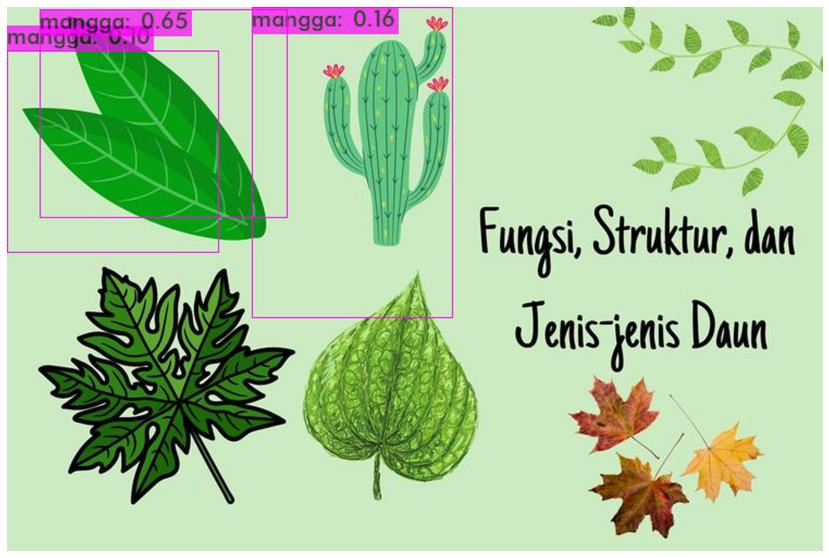

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3Tiny/yolov3_training_final.weights /mydrive/yolov3Tiny/images/image5.jpg -thresh 0.1
imShow('predictions.jpg')